In [22]:
import pandas as pd
import emoji
import re
import os
from tqdm import tqdm
import math
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import transformers
from soynlp.normalizer import repeat_normalize
import scipy.stats as stats
import matplotlib.pyplot as plt

from sentence_transformers.readers import InputExample
from torch.utils.data import DataLoader
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers import SentenceTransformer, models
from sentence_transformers import losses
from sentence_transformers.cross_encoder import CrossEncoder

In [104]:
test = pd.read_csv("../data/test.csv")
index = test.loc[test["source"].str.contains("rtt"),].index
index = list(index)
train_index = list(set(list(test.index)) - set(index))

In [105]:
def output():
    submission = pd.read_csv("../data/sample_submission.csv")
    output = pd.read_csv("../code/output.csv")
    leaderboard_output = pd.read_csv("../code/output_leaderboard.csv")
    kfold = pd.read_csv("../code/output_KFOLD_9127.csv")
    output_rtt = pd.read_csv("../code/output_rtt.csv")
    output_rtt.index = output_rtt["Unnamed: 0"].values
    output_no_puncutation = pd.read_csv("../code/output_no_puncutation.csv")
    output_rtts = pd.read_csv("../code/output_rtt2.csv")
    output_rtts.index = output_rtts["Unnamed: 0"].values

    for idx in train_index :
        submission.loc[idx,"target"] = output.loc[idx,"target"] * 0.4 + leaderboard_output.loc[idx,"target"] * 0.5 + kfold.loc[idx,"target"] * 0.1
    for idx in index :
        submission.loc[idx,"target"] = output.loc[idx,"target"] * 0.4 + leaderboard_output.loc[idx,"target"] * 0.5 + kfold.loc[idx,"target"] * 0.1
    
    return submission



In [106]:
submission = output()

In [107]:
submission.to_csv("submission.csv")

In [89]:
output = pd.read_csv("../code/output.csv")
leaderboard_output = pd.read_csv("../code/output_leaderboard.csv")
kfold = pd.read_csv("../code/output_KFOLD_9127.csv")
output_rtt = pd.read_csv("../code/output_rtt.csv")
output_rtt.index = output_rtt["Unnamed: 0"].values
output_no_puncutation = pd.read_csv("../code/output_no_puncutation.csv")
output_rtts = pd.read_csv("../code/output_rtt2.csv")

/tmp/ipykernel_113684/720812190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(output["target"],label = "output")
/tmp/ipykernel_113684/720812190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(leaderboard_output["target"],label = "leaderboard_output")
/tmp/ipykernel_113684/720812190.py

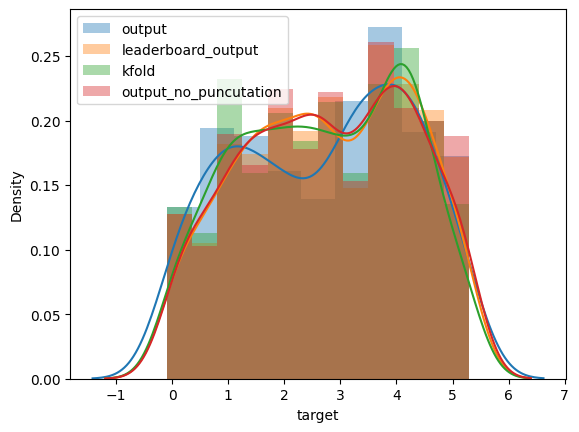

In [62]:
sns.distplot(output["target"],label = "output")
sns.distplot(leaderboard_output["target"],label = "leaderboard_output")
sns.distplot(kfold["target"],label = "kfold")
sns.distplot(output_no_puncutation["target"],label="output_no_puncutation")
plt.legend()

<AxesSubplot: ylabel='target'>

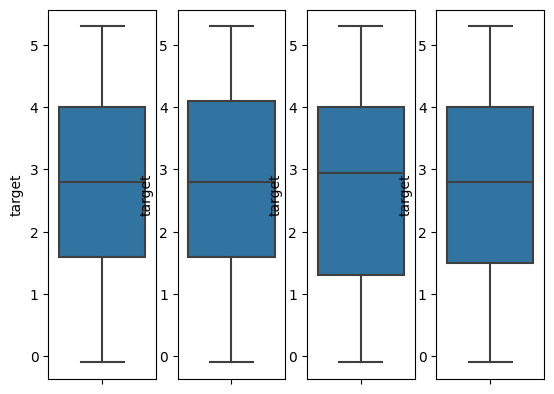

In [63]:
fig,ax = plt.subplots(1,4)
sns.boxplot(y = output_no_puncutation["target"],ax=ax[0])
sns.boxplot(y = leaderboard_output["target"],ax=ax[1])
sns.boxplot(y = output["target"],ax=ax[2])
sns.boxplot(y = kfold["target"],ax=ax[3])